In [ ]:
!

In [1]:
import numpy as np 
import pandas as pd 

from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white") #white background style for seaborn plots
sns.set(style="whitegrid", color_codes=True)

import warnings
warnings.simplefilter(action='ignore')


# New Section

In [2]:
train_df = pd.read_csv("titanic.csv")

# Read CSV test data file into DataFrame
test_df = pd.read_csv("titanic.csv")

# preview train data
train_df.head()

,passengerid,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S
1,2,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S
2,3,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S
3,4,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S
4,5,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S


In [3]:
print('The number of samples into the train data is {}.'.format(train_df.shape[0]))

The number of samples into the train data is 1309.


In [4]:
test_df.head()

,passengerid,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S
1,2,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S
2,3,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S
3,4,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S
4,5,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S


In [5]:
print('The number of samples into the test data is {}.'.format(test_df.shape[0]))

The number of samples into the test data is 1309.


In [6]:
train_df.isnull().sum()

passengerid       0
pclass            0
survived          0
name              0
sex               0
age             263
sibsp             0
parch             0
ticket            0
fare              1
cabin          1014
embarked          2
dtype: int64

In [7]:
print('Percent of missing "Age" records is %.2f%%' %((train_df['age'].isnull().sum()/train_df.shape[0])*100))

Percent of missing "Age" records is 20.09%


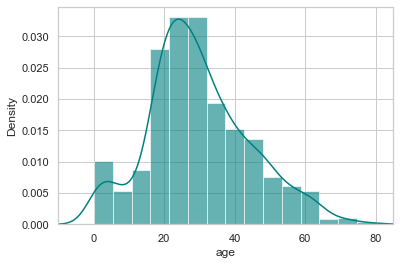

In [8]:
ax = train_df["age"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
train_df["age"].plot(kind='density', color='teal')
ax.set(xlabel='age')
plt.xlim(-10,85)
plt.show()

In [9]:
print('The mean of "Age" is %.2f' %(train_df["age"].mean(skipna=True)))
# median age
print('The median of "Age" is %.2f' %(train_df["age"].median(skipna=True)))

The mean of "Age" is 29.88
The median of "Age" is 28.00


In [10]:
print('Percent of missing "Cabin" records is %.2f%%' %((train_df['cabin'].isnull().sum()/train_df.shape[0])*100))

Percent of missing "Cabin" records is 77.46%


In [11]:
print('Percent of missing "Embarked" records is %.2f%%' %((train_df['embarked'].isnull().sum()/train_df.shape[0])*100))

Percent of missing "Embarked" records is 0.15%


Boarded passengers grouped by port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton):
S    914
C    270
Q    123
Name: embarked, dtype: int64


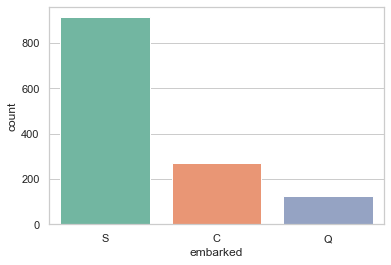

In [12]:
print('Boarded passengers grouped by port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton):')
print(train_df['embarked'].value_counts())
sns.countplot(x='embarked', data=train_df, palette='Set2')
plt.show()

In [13]:
print('The most common boarding port of embarkation is %s.' %train_df['embarked'].value_counts().idxmax())

The most common boarding port of embarkation is S.


In [14]:
train_data = train_df.copy()
train_data["age"].fillna(train_df["age"].median(skipna=True), inplace=True)
train_data["embarked"].fillna(train_df['embarked'].value_counts().idxmax(), inplace=True)
train_data.drop('cabin', axis=1, inplace=True)

In [15]:
train_data.isnull().sum()

passengerid    0
pclass         0
survived       0
name           0
sex            0
age            0
sibsp          0
parch          0
ticket         0
fare           1
embarked       0
dtype: int64

In [16]:
train_data.head()

,passengerid,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked
0,1,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,S
1,2,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,S
2,3,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,S
3,4,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,S
4,5,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,S


<AxesSubplot:xlabel='survived', ylabel='count'>

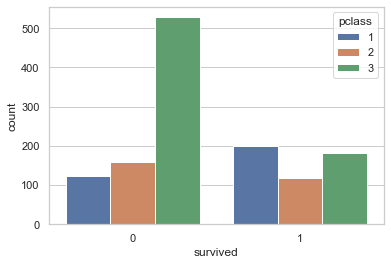

In [17]:
sns.countplot(x='survived', hue='pclass', data=train_df)

<AxesSubplot:xlabel='survived', ylabel='count'>

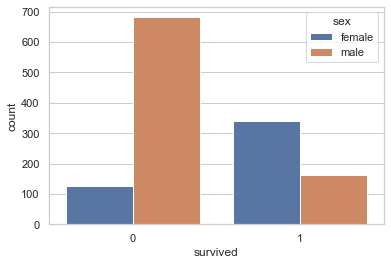

In [18]:
sns.countplot(x='survived', hue='sex', data=train_df)

In [19]:
def add_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        return int(train_df[train_df["pclass"] == Pclass]["age"].mean())
    else:
        return Age

In [20]:
train_df["age"] = train_df[["age", "pclass"]].apply(add_age,axis=1)

In [21]:
train_df.drop("cabin",inplace=True,axis=1)

In [22]:
train_df.dropna(inplace=True)

In [23]:
pd.get_dummies(train_df["sex"])

,female,male
0,1,0
1,0,1
2,1,0
3,0,1
4,1,0
...,...,...
1304,1,0
1305,1,0
1306,0,1
1307,0,1


In [24]:
sex = pd.get_dummies(train_df["sex"],drop_first=True)

In [25]:
embarked = pd.get_dummies(train_df["embarked"],drop_first=True)
pclass = pd.get_dummies(train_df["pclass"],drop_first=True)

In [26]:
train = pd.concat([train_df,pclass,sex,embarked],axis=1)

In [27]:
train.drop(["passengerid","pclass","name","sex","ticket","embarked"],axis=1,inplace=True)

In [28]:
X = train.drop("survived",axis=1)
y = train["survived"]

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

In [30]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

In [31]:
predictions = logmodel.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.84      0.85      0.85       247
           1       0.75      0.73      0.74       145

    accuracy                           0.81       392
   macro avg       0.80      0.79      0.79       392
weighted avg       0.81      0.81      0.81       392



In [32]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[211,  36],
       [ 39, 106]], dtype=int64)

In [33]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [34]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[211  36]
 [ 39 106]]


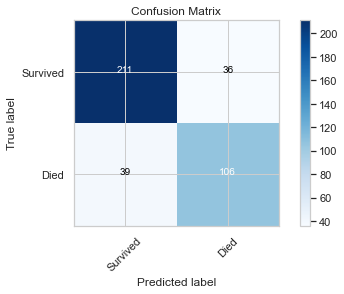

In [36]:
cm = confusion_matrix(y_true=y_test, y_pred=predictions)
cm_plot_labels = ["Survived","Died"]
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')